# Tabular Playground Series - Feb 2022

## Importación de librerías a utilizar

In [1]:
import zipfile
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Generación de DataFrame
### Primero descargo la información directo desde la API de Kaggle, la descomprimo y borro el zip original

In [2]:
# conda install -c conda-forge kaggle

Si no se tiene instalado kaggle, descomentar la celda de arriba y correrla. Luego entrar a la consola y correr $kaggle$. Esto creará la carpeta .kaggle en C:\Users\user\, donde se debe copiar el arcivo token (.json) que se obtiene de la subsección API en Account dentro del usuario propio de kaggle.

In [3]:
file = pathlib.Path("datasets/2022_02/train.csv")
if file.exists():
    print('Files already exists')
else:
    print('Creating the file')
    !kaggle competitions files -c tabular-playground-series-feb-2022
    !kaggle competitions download -c tabular-playground-series-feb-2022
    with zipfile.ZipFile("tabular-playground-series-feb-2022.zip", "r") as zip_ref:
        zip_ref.extractall(r"C:\Users\alanp\Data Science\kaggle_tabular_playground\datasets\2022_02")
    os.remove("tabular-playground-series-feb-2022.zip")

Files already exists


### Genero el DataFrame

In [4]:
train_df = pd.read_csv("datasets/2022_02/train.csv", index_col='row_id')
test_df = pd.read_csv("datasets/2022_02/test.csv", index_col='row_id')

## Chequeo de estructura y datos

In [5]:
print(train_df.shape)
print(test_df.shape)

(200000, 287)
(100000, 286)


In [6]:
train_df['target'].unique()

array(['Streptococcus_pyogenes', 'Salmonella_enterica',
       'Enterococcus_hirae', 'Escherichia_coli', 'Campylobacter_jejuni',
       'Streptococcus_pneumoniae', 'Staphylococcus_aureus',
       'Escherichia_fergusonii', 'Bacteroides_fragilis',
       'Klebsiella_pneumoniae'], dtype=object)

In [7]:
train_df.head()

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
row_id,,,,,,,,,,,,,,,,,,,,,
0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
1,-9.536743e-07,-0.000010,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica
2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,-0.000007,...,0.000084,0.000048,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.046326e-06,Salmonella_enterica
3,4.632568e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,-0.000007,...,0.000151,0.000100,0.000180,0.000202,0.000153,0.000021,0.000015,0.000046,-9.536743e-07,Salmonella_enterica
4,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae


In [8]:
train_df.describe()

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
count,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,2.000000e+05,2.000000e+05
mean,6.421457e-07,-0.000003,-0.000014,-0.000010,0.000005,0.000025,0.000014,-0.000009,-0.000028,-0.000008,...,0.000135,0.000348,0.000253,0.000464,0.000581,0.000379,0.000062,8.982134e-05,1.170014e-04,2.215407e-07
std,8.654927e-05,0.000132,0.000287,0.000436,0.000683,0.000869,0.000775,0.000441,0.000107,0.000083,...,0.000711,0.001117,0.000914,0.001238,0.001528,0.001182,0.000466,5.475606e-04,6.788277e-04,2.050081e-05
min,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-9.536743e-06,-9.536743e-06,-9.536743e-07
25%,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-9.536743e-06,-9.536743e-06,-9.536743e-07
50%,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000237,-0.000199,-0.000114,-0.000043,-0.000010,...,0.000014,0.000064,0.000047,0.000124,0.000114,0.000043,-0.000010,4.632568e-07,4.632568e-07,-9.536743e-07
75%,-9.536743e-07,-0.000003,-0.000013,-0.000004,-0.000011,0.000003,-0.000030,0.000004,-0.000028,-0.000010,...,0.000111,0.000463,0.000297,0.000684,0.000774,0.000365,0.000030,6.046326e-05,6.946326e-05,-9.536743e-07
max,9.999046e-03,0.009990,0.009957,0.009886,0.019800,0.019760,0.019800,0.009886,0.009957,0.009990,...,0.019957,0.019914,0.019957,0.019914,0.019914,0.019957,0.009990,9.990463e-03,1.999046e-02,9.990463e-04


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Columns: 287 entries, A0T0G0C10 to target
dtypes: float64(286), object(1)
memory usage: 439.5+ MB


### Valores máximos y mínimos del DF

In [10]:
print(f'Valor máximo en todo el DF de entrenamiento: {max(train_df.max(axis=0, numeric_only=True))}')
print(f'Valor mínimo en todo el DF de entrenamiento: {min(train_df.min(axis=0, numeric_only=True))}')

Valor máximo en todo el DF de entrenamiento: 0.0979837036132812
Valor mínimo en todo el DF de entrenamiento: -0.0240325927734375


In [11]:
print(f'Valor máximo en todo el DF de testeo: {max(test_df.max(axis=0, numeric_only=True))}')
print(f'Valor mínimo en todo el DF de testeo: {min(test_df.min(axis=0, numeric_only=True))}')

Valor máximo en todo el DF de testeo: 0.1079837036132812
Valor mínimo en todo el DF de testeo: -0.0240325927734375


### Chequeo de NaN values en las columnas

In [12]:
print('Hay valores nulos? ', train_df.isna().sum().any())
train_df.isna().sum().value_counts()

Hay valores nulos?  False


0    287
dtype: int64

No hay valores faltantes

### Chequeo de outliers y eliminación de filas con algún outlier (zscore >= 3)

In [13]:
train_df_labels = train_df.pop('target')

In [14]:
from scipy import stats
train_df = train_df[(np.abs(stats.zscore(train_df)) < 3).all(axis=1)]

In [15]:
train_df.shape

(122623, 286)

In [16]:
train_df_labels = train_df_labels[train_df.index]

In [17]:
train_df_labels.shape

(122623,)

In [18]:
train_df['target'] = train_df_labels

### chequeo desbalance en cantidad de targets en train_df 

<AxesSubplot:xlabel='target', ylabel='target'>

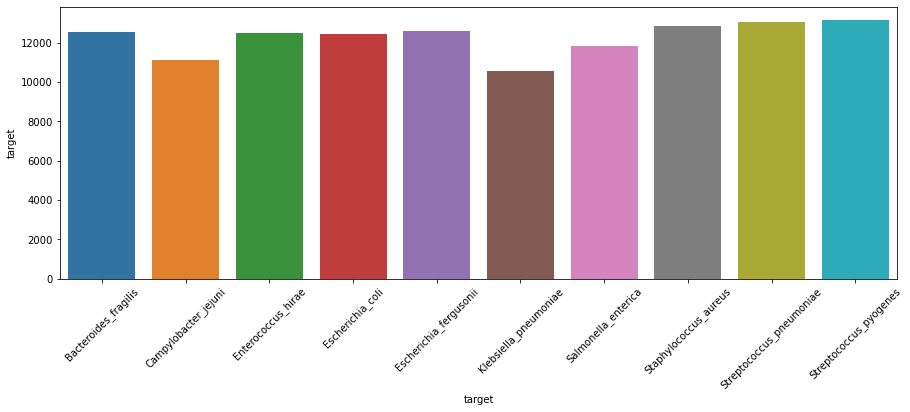

In [19]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.barplot(x=train_df.groupby('target')['target'].count().index, y=train_df.groupby('target')['target'].count())

Las diez bacterias tienen cantidad similar de entradas, por lo que considero que está balanceado y puedo utilizar los datos como están

### LabelEncoder para convertir el target a numérico

In [20]:
la = LabelEncoder()
train_df['target'] = la.fit_transform(train_df['target'])

In [21]:
train_df.target

row_id
1         6
2         6
3         6
5         3
7         1
         ..
199994    7
199995    6
199996    9
199997    8
199999    5
Name: target, Length: 122623, dtype: int32

### distplot de todas las features
Si tuviera más tiempo, podría analizar un poco mejor estos gráficos, ya que se ve 

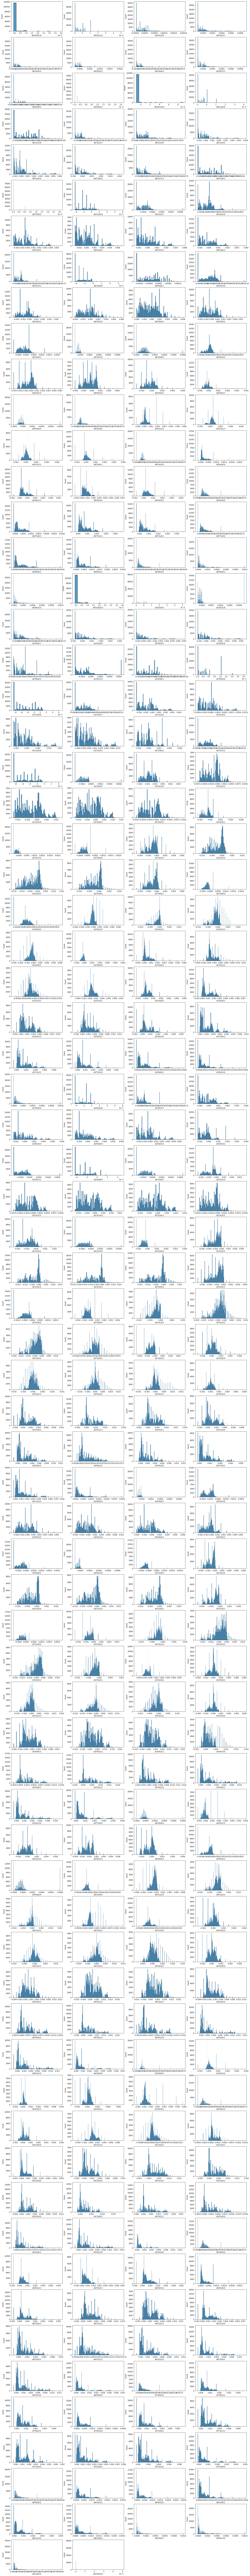

In [40]:
col = train_df.columns
plt.figure(figsize = (25,280))
for i in range (len(col)-1):
    plt.subplot(72, 4, i+1)
    sns.histplot(train_df[col[i]])

## Modelados

### Importación de librerías

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

### Separación de entrenamiento, validación y las labels

In [23]:
x_train, x_val = train_test_split(train_df, test_size=0.2)
print(f'train shape: {x_train.shape}')
print(f'validation shape: {x_val.shape}')
y_train = x_train.pop('target')
y_val = x_val.pop('target')
print(f'new train shape: {x_train.shape}')
print(f'new validation shape: {x_val.shape}')

train shape: (98098, 287)
validation shape: (24525, 287)
new train shape: (98098, 286)
new validation shape: (24525, 286)


### Regresión logística

In [24]:
# lr = LogisticRegression(solver='saga')
# lr.fit(x_train, y_train)
# train_pred = lr.predict(x_train)
# val_pred = lr.predict(x_val) 
# accuracy_score(y_train, train_pred), accuracy_score(y_val, val_pred)

In [25]:
# print('train data:')
# print(classification_report(y_train, train_pred))
# print('-----------------------------------------------------')
# print('test data:')
# print(classification_report(y_val, val_pred))

### naive-Bayes

In [26]:
# gnb = GaussianNB()
# pred_train = gnb.fit(x_train, y_train).predict(x_train)
# pred_val = gnb.predict(x_val)
# print("Number of mislabeled points out of a total %d points : %d"
# % (x_val.shape[0], (y_val != pred_val).sum()))

In [27]:
# accuracy_score(y_train, pred_train), accuracy_score(y_val, val_pred)

In [28]:
# print('train data:')
# print(classification_report(y_train, pred_train))
# print('-----------------------------------------------------')
# print('test data:')
# print(classification_report(y_val, pred_val))

### Random Forest Classifier

In [41]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=1)
pred_train = rfc.fit(x_train, y_train).predict(x_train)
pred_val = rfc.predict(x_val)
print("Number of mislabeled points out of a total %d points : %d"
% (x_val.shape[0], (y_val != pred_val).sum()))

Number of mislabeled points out of a total 24525 points : 2826


In [42]:
accuracy_score(y_train, pred_train), accuracy_score(y_val, pred_val)

(0.8853493445330181, 0.8847706422018349)

In [43]:
print('train data:')
print(classification_report(y_train, pred_train))
print('-----------------------------------------------------')
print('test data:')
print(classification_report(y_val, pred_val))

train data:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      9981
           1       1.00      0.88      0.94      8868
           2       0.99      0.70      0.82     10025
           3       0.84      0.92      0.88     10006
           4       0.92      0.91      0.91     10066
           5       1.00      0.95      0.97      8384
           6       0.98      0.90      0.94      9490
           7       0.93      0.90      0.91     10372
           8       0.90      0.86      0.88     10360
           9       0.61      0.97      0.75     10546

    accuracy                           0.89     98098
   macro avg       0.92      0.89      0.89     98098
weighted avg       0.91      0.89      0.89     98098

-----------------------------------------------------
test data:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      2563
           1       1.00      0.89      0.94      2270
 

### Predicción del test_df con el modelo elegido

In [44]:
pred_test = rfc.predict(test_df)

In [45]:
predictions = la.inverse_transform(pred_test)
predictions

array(['Escherichia_fergusonii', 'Escherichia_coli',
       'Streptococcus_pyogenes', ..., 'Streptococcus_pyogenes',
       'Staphylococcus_aureus', 'Streptococcus_pyogenes'], dtype=object)

In [46]:
output = pd.DataFrame({'row_id': test_df.index, 'target': predictions})
output.to_csv('datasets/2022_02/submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [47]:
!kaggle competitions submit -c tabular-playground-series-feb-2022 -f datasets/2022_02/submission.csv -m "5 - RandomForestClassifier, more estimators"

400 - Bad Request



  0%|          | 0.00/2.81M [00:00<?, ?B/s]
  0%|          | 8.00k/2.81M [00:00<01:25, 34.2kB/s]
  4%|4         | 128k/2.81M [00:00<00:06, 453kB/s]  
  7%|6         | 200k/2.81M [00:00<00:05, 523kB/s]
 11%|#         | 304k/2.81M [00:00<00:03, 691kB/s]
 14%|#3        | 392k/2.81M [00:00<00:03, 749kB/s]
 17%|#7        | 496k/2.81M [00:00<00:03, 793kB/s]
 20%|##        | 584k/2.81M [00:01<00:07, 334kB/s]
 28%|##7       | 792k/2.81M [00:01<00:03, 588kB/s]
 34%|###3      | 968k/2.81M [00:01<00:02, 792kB/s]
 41%|####      | 1.14M/2.81M [00:01<00:01, 1.03MB/s]
 47%|####7     | 1.32M/2.81M [00:01<00:01, 1.21MB/s]
 53%|#####2    | 1.48M/2.81M [00:01<00:01, 1.18MB/s]
 59%|#####9    | 1.66M/2.81M [00:02<00:00, 1.36MB/s]
 65%|######5   | 1.83M/2.81M [00:02<00:00, 1.42MB/s]
 71%|#######   | 1.98M/2.81M [00:02<00:00, 1.42MB/s]
 76%|#######5  | 2.13M/2.81M [00:02<00:00, 1.44MB/s]
 81%|########1 | 2.28M/2.81M [00:02<00:00, 1.36MB/s]
 86%|########6 | 2.42M/2.81M [00:02<00:00, 1.35MB/s]
 91%|#########1

Primer intento con Logistic regression con parámetros predeterminado y sólo descartando filas de entrenamiento con z-score>3: Score 0.57738

Segundo intento con Logistic regression con solver='lbfgs', max_iter=1000 y sólo descartando filas de entrenamiento con z-score>3: Score 0.57878

Tercer intento con Logistic regression con solver='saga' y sólo descartando filas de entrenamiento con z-score>3: Score 0.57723

*LogisticRegression tal como está no es un buen fit, pero considero esto la base para las soluciones más optimizadas.*
*Creo que randomForest puede ser un buen segundo intento*

Cuarto intento con RandomForestClassifier: Score: 0.61558

No pude hacer la otra con más estimadores, porque por error envié 3 veces la misma anterior. Al ser el último día, no podré hacer el submit

**Conslusión**: No llegué a hacer mucho análisis porque tenía tres días solamente. Con más tiempos, analizaría mejor los gráficos individuales de cada feature para ver situaciones llamativas y analizar mejor esos casos.

Si hacía eso podría haber hecho el análisis sin descartar de una todos los outliers, ya que esto tiene varios conflictos:
- Como no estoy eliminando la misma proporción de todos los targets, esto puede significar que esos outliers son parámetros diferenciadores relevantes para esas bacterias. 
- Se borraron demasiados datos, con lo cual podría no haber borrado la fila entera, sino sólo esos datos y reemplazarlos por la mediana/media (lo mejor sería del target correspondiente, pero en test no sabría ese dato).
- Esta forma hizo imposible que pudiera realizarlo en el test_df, ya que terminaría no prediciendo esas filas